# Assignment 2

Anya Kapitula

## Problem 1

## import libraries

In [25]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import warnings

### a)

### display level set

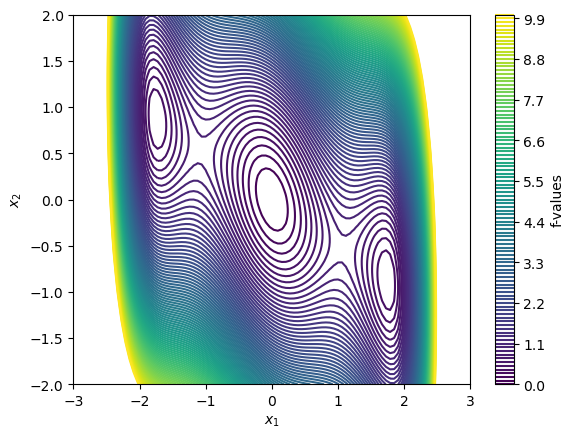

In [26]:
# Generating grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y) 

# 3-hump camel function
Z = 2*X**2 - 1.05*X**4 + X**6/6 + X*Y + Y**2

# Defining contour levels
levels = np.linspace(0, 10, 101)

# Creating contour plot
contour = plt.contour(X, Y, Z,levels = levels)

# Adding colorbar
plt.colorbar(contour, label='f-values')

# Adding labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.title('$f$')

# Displaying the plot
plt.show()

### gradient descent around the origin

In [27]:
def gradient_descent(x1, x2, eta, k, beta = .87):
    z = 2*x1**2 - 1.05*x1**4 + x1**6/6 + x1*x2 + x2**2
    
    # recording x1,x2,f values
    x1vals = np.array(x1)
    x2vals = np.array(x2)
    fvals = np.array(z)
    
    for i in range(k):
        #if (i+1) % 5 == 0:
         #   eta *= beta #decrease the learning rate
        
        # updating x1, x2 simultaneously using the gradient at previous point (x1,x2)
        x1, x2 = x1 - eta * (4*x1- 4.2*x1**3 + x1**5 + x2), x2 - eta * (x1 + 2*x2)

        eta = eta * beta
        
        x1vals = np.append(x1vals, x1)
        x2vals = np.append(x2vals, x2)
        
        # recording the function value at the new point
        z = 2*x1**2 - 1.05*x1**4 + x1**6/6 + x1*x2 + x2**2
        fvals = np.append(fvals, z)

    return x1vals, x2vals, fvals

### display the path of gradient descent

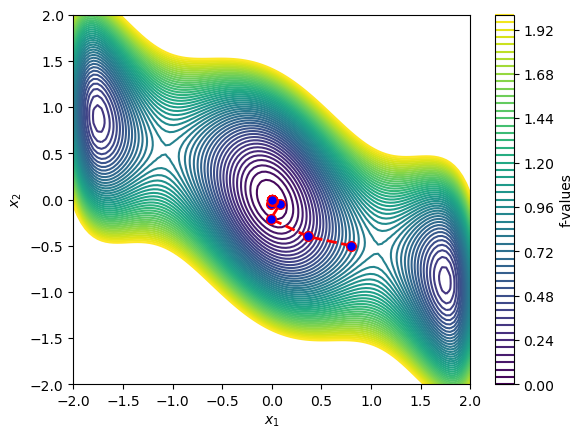

In [28]:
# choose a new, localized grid around the target point to zoom in
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y) 
Z = 2*X**2 - 1.05*X**4 + X**6/6 + X*Y + Y**2

levels = np.linspace(0, 2, 51)

contour = plt.contour(X, Y, Z,levels = levels)
plt.colorbar(contour, label='f-values')

x1vals, x2vals, fvals = gradient_descent(x1=0.8, x2=-0.5, eta=0.5, k=30)
# x1vals, x2vals, fvals = gradient_descent(x1 = x1[0], x2 = x2[0], eta=0.5, k=30)
# x1vals, x2vals, fvals = gradient_descent(x1 = 1.5, x2 = -.5, eta=0.3, k=30)

plt.plot(x1vals, x2vals, color='red',linestyle='dashed',linewidth =2,
         marker='o', markerfacecolor='blue', markersize=7)

# Adding labels and title
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Displaying the plot
plt.show()

### plot the f-convergence curve

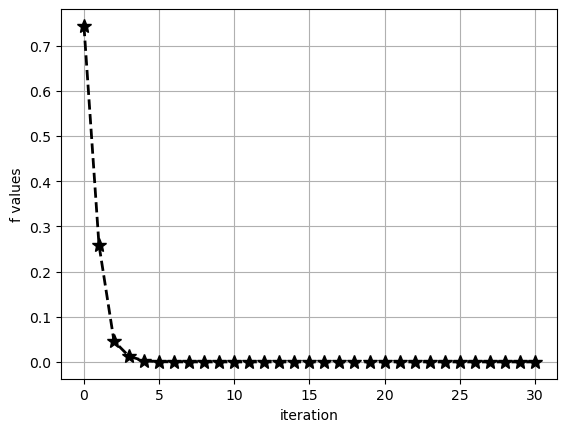

In [29]:
plt.plot(fvals, color='black',linestyle='dashed',linewidth =2,
         marker='*', markersize=10)
plt.xlabel('iteration')
plt.ylabel('f values')
plt.grid('on')

Gradient descent converges to the point (0,0). 

## b)

### Gradient Descent with 100 initial locations

In [30]:
# Suppress UserWarning
warnings.filterwarnings("ignore")

# Generate initial random points for x1, x2
#np.random.seed(0)
m=100
x1 = np.random.uniform(-3, 3, m)
x2 = np.random.uniform(-2, 2, m)

# recording the final x1, x2 values
x1final = []
x2final = []
fval_final = []
for i in range(m):
    x1vals, x2vals, fvals = gradient_descent(x1[i], x2[i], eta=0.03, k=100, beta = 1)
    x1final.append(x1vals[-1])
    x2final.append(x2vals[-1])
    fval_final.append(fvals[-1])

In [31]:
#print (x1, x2)

### Plotting

AttributeError: 'Legend' object has no attribute 'legendHandles'

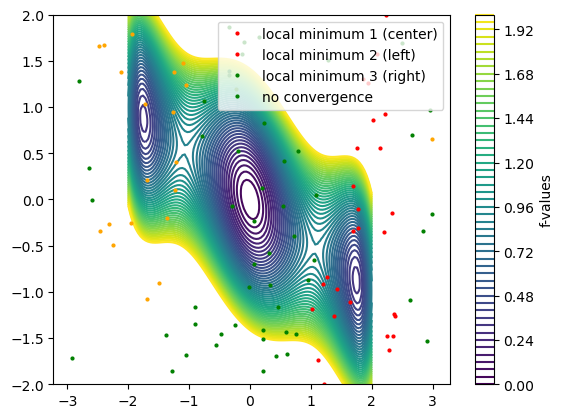

In [32]:
# choose a new, localized grid around the target point to zoom in
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = 2*X**2 - 1.05*X**4 + X**6/6 + X*Y + Y**2

levels = np.linspace(0, 2, 51)

contour = plt.contour(X, Y, Z,levels = levels)
plt.colorbar(contour, label='f-values')
    
convergence_points = [[],[],[],[]]

for i, j, k, m in zip(x1final, x2final, x1, x2):
    if 1.5 <= i <= 2 and -1 <= j <= -0.5:
        plt.plot(k, m, 'o', color='red', markersize=2)
        #plt.plot(i, j, 'o', color='red', markersize=4)
        convergence_points[0].append(i)
    elif -2 <= i <= -1.6 and 0.65 <= j < 1.25:
        plt.plot(k, m, 'o', color='orange', markersize=2)
        #plt.plot(i, j, 'o', color='orange', markersize=4)
        convergence_points[1].append(i)
    elif -0.3 <= i <= 0.3 and -0.3 <= j <= 0.3:
        plt.plot(k, m, 'o', color='green', markersize=2)
        #plt.plot(i, j, 'o', color='green', markersize=4)
        convergence_points[2].append(i)
    else:
        plt.plot(k, m, 'o', color='blue', markersize=2)
       #plt.plot(i, j, 'o', color='blue', markersize=4)
        convergence_points[3].append(i)

legend_labels = ['local minimum 1 (center)', 'local minimum 2 (left)', 'local minimum 3 (right)', 'no convergence']
legend = plt.legend(legend_labels, loc='upper right')
legend.legendHandles[0].set_color('green')
legend.legendHandles[1].set_color('orange')
legend.legendHandles[2].set_color('red')
legend.legendHandles[3].set_color('blue')

#Change legend font size
for label in legend.get_texts():
    label.set_fontsize('xx-small')

index = 0
for min in range(len(convergence_points)-1):
    print(f'{len(convergence_points[index])} points converged to local minimum {index+1}')
    index += 1

print (f'{len(convergence_points[-1])} points did not converge to any local minimum')

## c)

In [9]:
def gradient(x0:np.array): 
    x1,x2 = x0
    
    # updating x1, x2 simultaneously using the gradient at previous point (x1,x2)
    x1, x2 = (4*x1- 4.2*x1**3 + x1**5 + x2), (x1 + 2*x2)

    return np.array([x1, x2])

In [10]:
def heavy_ball_gradient_descent(x0:np.array, T, alpha:float, gamma:float):
    m = gradient(x0=x0)
    x_t0 = x0

    xvals = np.array(x_t0[0])
    yvals = np.array(x_t0[1])

    for i in range(T):
        grad_x_t = gradient(x_t0)
        m = (gamma * m) + ((1.0 - gamma) * grad_x_t)
        x_t1 = x_t0 - (alpha * m)
        xvals = np.append(xvals, x_t0[0])
        yvals = np.append(yvals, x_t0[1])
        x_t0 = x_t1

    return xvals, yvals

Number of convergence points: 10/11
Converging gamma points: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Diverging gamma points: [1.0]


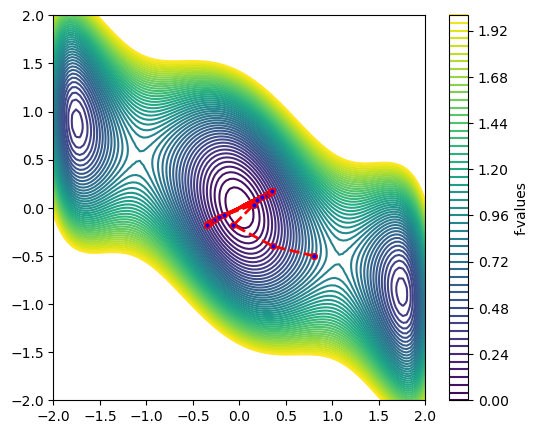

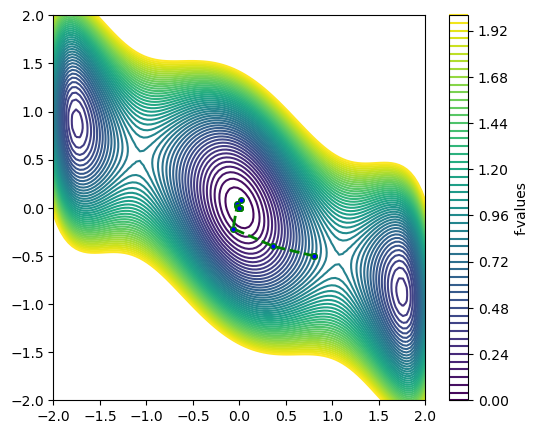

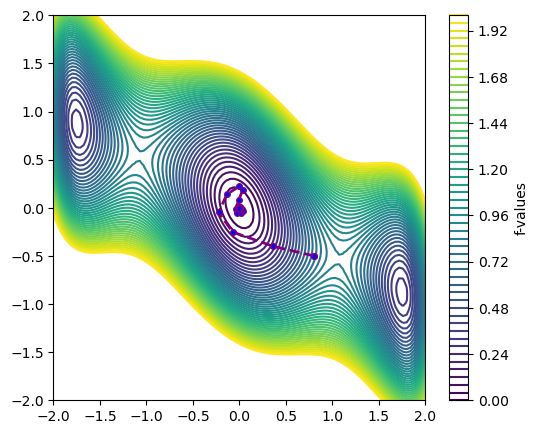

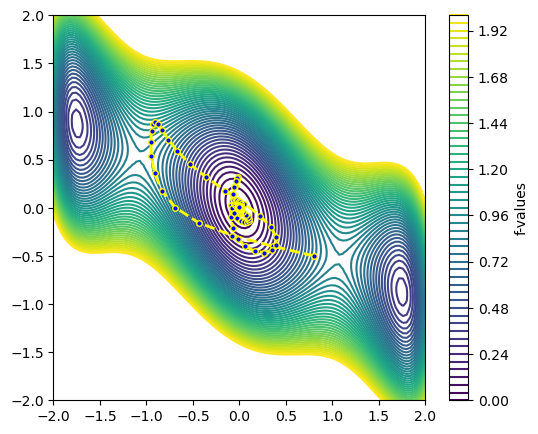

In [11]:
x0 = np.array([0.8, -0.5])

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = 2*X**2 - 1.05*X**4 + X**6/6 + X*Y + Y**2

levels = np.linspace(0, 2, 51)

#contour = plt.contour(X, Y, Z,levels = levels)
#plt.colorbar(contour, label='f-values')

colors = ['red', 'green', 'purple', 'yellow']
count=0

convergence = []
divergence = []
points = np.linspace(0, 10, 11)
for i in points:
    gamma = i/10
    xvals, yvals = heavy_ball_gradient_descent(x0, T=100, alpha=0.5, gamma=gamma)
    # print(f'xvals for {gamma}:\n{xvals}\nyvals for {gamma}:\n{yvals}\n\n')
    finalx, finaly = xvals[-1], yvals[-1]
    if((i*10)%3 == 0):
        plt.figure(figsize=(6,5))
        contour = plt.contour(X, Y, Z,levels = levels)
        plt.colorbar(contour, label='f-values')
        plt.plot(xvals, yvals, color=colors[count],linestyle='dashed',linewidth =2,
            marker='o', markerfacecolor='blue', markersize=4)
        count+=1
    if(-0.4 <= finalx <= 0.4 and -0.4 <= finaly <= 0.4):
        convergence.append((finalx, finaly, gamma))
    else:
        divergence.append((finalx, finaly, gamma))

print(f'Number of convergence points: {len(convergence)}/{len(points)}')
print(f'Converging gamma points: {[i[2] for i in convergence]}')
print(f'Diverging gamma points: {[i[2] for i in divergence]}')

#make different plots for each value

# 2. 

In [33]:
#  simulate a linear system of n equations with m unknowns
np.random.seed(123)
n = 20
m = 10
A = np.random.normal(0, 1, size = (n, m))
x_true = np.random.normal(0, 1, size = (m, 1))
b = A.dot(x_true) + np.random.normal(0, 0.1, size = (n, 1))

#print true coefficients
x_true.flatten()

array([ 0.70331012, -0.59810533,  2.2007021 ,  0.68829693, -0.00630725,
       -0.2066623 , -0.08652229, -0.91530707, -0.09520254,  0.27868352])

## a) 

#### solve analytically

In [34]:
#1/n doesn't need to be considered
ATA = np.transpose(A).dot(A)
ATb = np.transpose(A).dot(b)
x_analytical = np.linalg.solve(ATA,ATb)

#print estimated coefficients
print(x_analytical.flatten())

[ 7.41517923e-01 -5.66706648e-01  2.24124488e+00  6.93749530e-01
  2.05458982e-03 -1.73813790e-01 -9.66810259e-02 -8.59018273e-01
 -1.13989456e-01  2.87664829e-01]


## b) 

#### solve using gradient descent

In [35]:
#ignore
#x = np.linspace(-2, 2, 100)
#y = np.linspace(-2, 2, 100)
#X, Y = np.meshgrid(x, y) 
#Z = (n**-1)*(np.linalg.norm(A*X-b))**2

#levels = np.linspace(0, 2, 51)

#contour = plt.contour(X, Y, Z,levels = levels)
#plt.colorbar(contour, label='f-values')

#x1vals, x2vals, fvals = gradient_descent(x1=0.8, x2=-0.5, eta=0.5, k=30, beta=0.5)

#plt.plot(x1vals, x2vals, color='red',linestyle='dashed',linewidth =2,
         #marker='o', markerfacecolor='blue', markersize=7)

# Adding labels and title
#plt.xlabel('$x_1$')
#plt.ylabel('$x_2$')

# Displaying the plot
#plt.show()

In [36]:
def gradient_descent(n, m, k, eta):
    A = np.random.normal(0, 1, size=(n, m))
    x_true = np.random.normal(0, 1, size=(m, 1))
    b = A.dot(x_true) + np.random.normal(0, 0.1, size=(n, 1))

    #x0 = np.random.normal(0, 1, size=(m, 1))  # random initial guess
    x0 = np.zeros([m,1])
    #x1vals = np.empty((0, 1))

    xvals=x0

    for i in range(k):
        grad_vec = (2/n) * np.transpose(A).dot(A.dot(x0) - b)
        x1 = x0 - eta * grad_vec
        #x1vals = np.append(x1vals, x1)
        x0 = x1
        xvals = np.c_[xvals, x0]

    return xvals  # Return the collected x1 values
    
xvals = gradient_descent(20, 10, 100, 0.15)
xvals

array([[ 0.        , -0.01099785, -0.10762499, ..., -1.16000518,
        -1.1601316 , -1.16025282],
       [ 0.        ,  0.41980118,  0.63315141, ...,  1.53061358,
         1.53073914,  1.53085942],
       [ 0.        ,  0.21896871,  0.31341436, ...,  0.1618619 ,
         0.16171798,  0.16158046],
       ...,
       [ 0.        , -0.47988695, -0.71370296, ..., -1.68585202,
        -1.68587621, -1.68589798],
       [ 0.        ,  0.54152056,  0.87354045, ...,  1.82884662,
         1.8284904 ,  1.82814664],
       [ 0.        ,  0.27111679,  0.40909116, ...,  0.31189522,
         0.31172406,  0.31155903]])

In [37]:
xvals.shape

(10, 101)

[1.08508806 0.56355287 0.35443469 0.2663998  0.21950598 0.18738154
 0.16231709 0.14178037 0.12463067 0.11016567 0.09787422 0.08735998
 0.07830895 0.07047014 0.06364205 0.05766217 0.05239886 0.04774497
 0.04361279 0.03993007 0.03663688 0.03368317 0.03102685 0.02863225
 0.02646891 0.02451069 0.02273495 0.02112203 0.01965471 0.01831788
 0.01709818 0.01598381 0.01496425 0.01403015 0.01317315 0.0123858
 0.01166138 0.01099391 0.01037798 0.00980877 0.00928192 0.00879353
 0.00834006 0.00791836 0.00752559 0.00715917 0.0068168  0.0064964
 0.00619611]


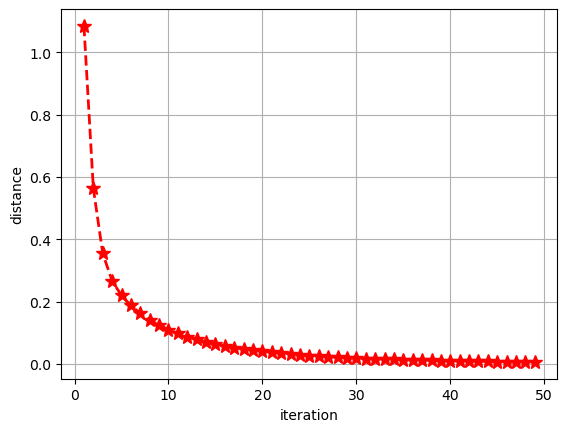

In [38]:
# computing distances between consecutive points along the path
dists = []
for i in range(1, 50):
    dists = np.append(dists, np.sqrt(np.sum((xvals[:,i]-xvals[:,i-1])**2)))

print(dists)  
    
plt.plot(range(1, 50), dists, color='red',linestyle='dashed',linewidth =2,
         marker='*', markersize=10)
plt.xlabel('iteration')
plt.ylabel('distance')
plt.grid('on')

# 3.

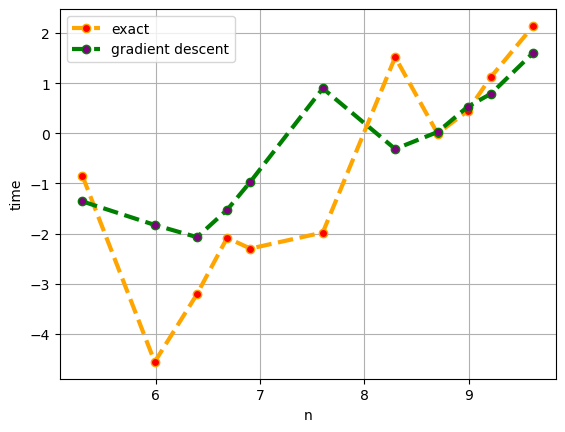

In [39]:
import time

runtime_1 = []
runtime_2 = []

for n in [200,400,600,800,1000,2000,4000,6000,8000,10000,15000]:
    m=int(n/2)
    A = np.random.normal(0, 1, size=(n, m))
    x_true = np.random.normal(0, 1, size=(m, 1))
    b = A.dot(x_true) + np.random.normal(0, 0.1, size=(n, 1))

    #exact
    starttime = time.time()
    s=np.transpose(A)@A
    t=np.transpose(A)@b
    x=np.linalg.solve(s,t)
    runtime_exact = time.time() - starttime
    runtime_1 = np.append(runtime_1, runtime_exact)

    #gradient descent
    starttime=time.time()
    x0=np.zeros([m,1])
    eta = .1
    k=100

    for i in range (k):
        grad_vec = (2/n)*(np.transpose(A)@(A@x0-b))
        x1=x0-eta*grad_vec
        x0=x1
    runtime_gd = time.time() - starttime
    runtime_2 = np.append(runtime_2, runtime_gd)

n = np.array([200,400,600,800,1000,2000,4000,6000,8000,10000,15000])
n= np.log(n)

runtime_1 = np.log(runtime_1)
runtime_2 = np.log(runtime_2)

#plotting
plt.plot(n, runtime_1, color='orange', linestyle='dashed', linewidth = 3, marker = 'o', markerfacecolor = 'red', markersize=6)
plt.plot(n, runtime_2, color='green', linestyle='dashed', linewidth = 3, marker = 'o', markerfacecolor = 'purple', markersize=6)

plt.legend(['exact', 'gradient descent'])
plt.xlabel('n')
plt.ylabel('time')
plt.grid('on')